# Task 2: Analysis 

## Task 2.1 : Classic and sequential A/B testing analysis


In [6]:
!pip install sprt

**Import** libraries for drwaing and analysis.

In [7]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
sns.set()
import warnings
warnings.filterwarnings('ignore')
path='C:/Users/chuna/Downloads/week4/AdSmartABdata.csv'
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


**Import** data as csv

In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1YSn01vvlHKQaAIBtwIXRNd-oTaTuDN09"}) 
downloaded.GetContentFile('ABAdRecall.csv')
import pandas as pd
data=pd.read_csv('ABAdRecall.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


Check all user id's are **unique**

In [10]:
df=data
df['auction_id'].value_counts().nlargest() ## all unique

11fb0529-62ae-4d77-93bc-7e938951c803    1
5c7a5c46-1fd1-448d-a691-317d62d6404b    1
77ea527c-e597-4c92-aee7-2f9ecfd4aa72    1
914ef053-a185-4dc7-a317-b77d84a1b25e    1
99b21980-34a8-4071-b5b4-bd9d6659d783    1
Name: auction_id, dtype: int64

**Clean** data of users that didnt participate.

In [11]:
df_clean=df.drop(df[(df.yes == 0) & (df.no == 0)].index)
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


Group datapoints as control and exposed.Also count number of success and fail in each.

In [12]:
df_grouped = df_clean.groupby('experiment').agg(yes=('yes', 'sum'),no=('no','sum'))

df_grouped['total']=df_grouped['yes']+df_grouped['no']
df_grouped

,yes,no,total
experiment,,,
control,264,322,586
exposed,308,349,657


This **plot** shows how many people said `yes` or `no` from each group.

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Values'),
 Text(0.5, 1.0, 'Bar plot of Groups')]

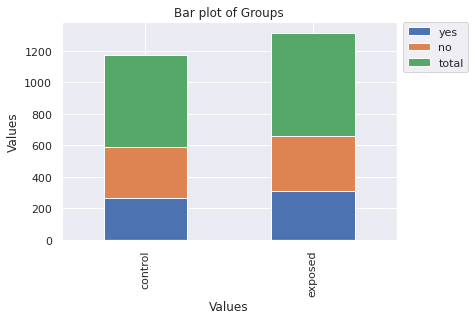

In [13]:
lp=df_grouped.plot.bar(stacked=True)
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Bar plot of Groups', xlabel='Values', ylabel='Values')

In [14]:
#sns.relplot(x="index", y='yes', height= 8, aspect=1, hue="browser", data=df)


In [15]:
df_control=df.loc[df['experiment'] == 'control']
df_exposed=df.loc[df['experiment'] == 'exposed']



In [16]:
#df_control_clean['yes'].value_counts().plot(kind='bar')

In [17]:
df_exposed_clean=df_clean.loc[df_clean['experiment'] == 'exposed']
df_control_clean=df_clean.loc[df_clean['experiment'] == 'control']



In [18]:
#sns.stripplot(x="y", data=df_control_clean, size=5)

**yes VS no** value among the **`controlled`**

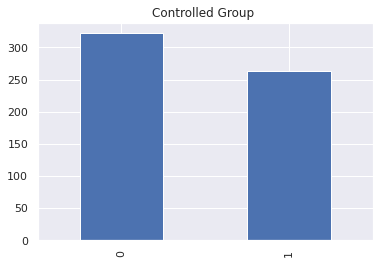

In [19]:
df_control_clean['yes'].value_counts().plot(kind='bar',title='Controlled Group ')

**yes VS no** value among the **`exposed`**

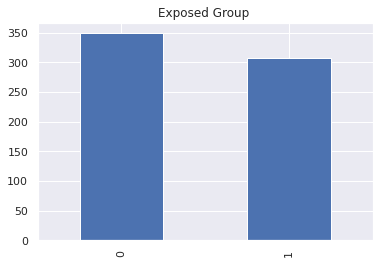

In [20]:
df_exposed_clean['yes'].value_counts().plot(kind='bar',title='Exposed Group ')

Most used devices amoing users

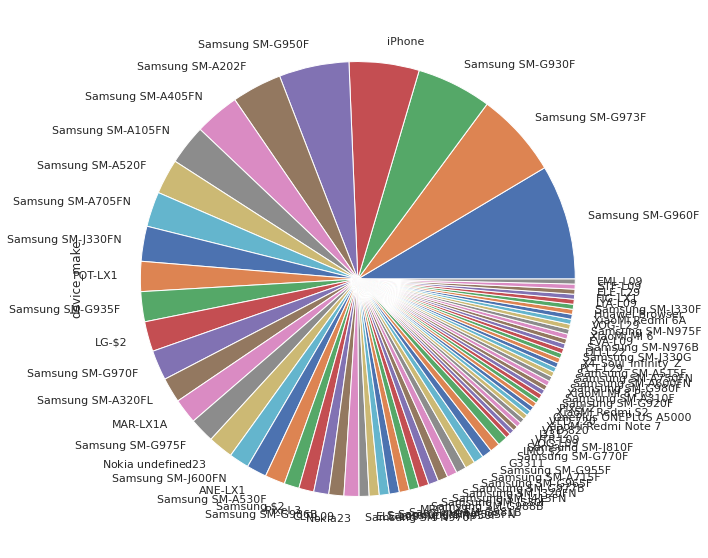

In [21]:
b=df_control_clean[df_control_clean['device_make']!='Generic Smartphone']
b['device_make'].value_counts().plot(kind='pie', figsize=(20,10))

**Number of `rows` and `columns`**

In [22]:
df_control_clean.shape

(586, 9)

In [23]:
df_exposed_clean.shape

(657, 9)

**Number of `yes` and `no`**

In [24]:
df_control_clean['yes'].value_counts()

0    322
1    264
Name: yes, dtype: int64

In [25]:
df_control_clean['yes'].value_counts()

0    322
1    264
Name: yes, dtype: int64

# **Classical A/B Testing**

Assign the number of total users in the **Experimental** and **Control** groups.Also show how many of each was converted `"Recogonized the brand that was advertized"`.

In [26]:
num_a, num_b = 589, 657
yes_a, yes_b = 264, 308
rate_a, rate_b = yes_a / num_a, yes_b / num_b

Plot how the probability of conversion lies within each population.

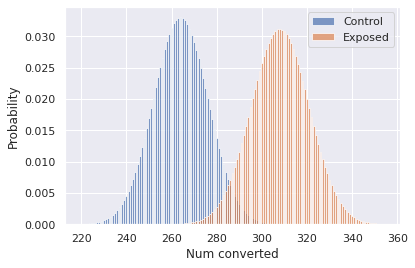

In [27]:
# Determine the probability of having x number of click throughs
clicks = np.arange(220, 355)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="Control", alpha=0.7)
plt.bar(clicks, prob_b, label="Exposed", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

Now by using approximation due to large sample numbers we will generate a **normal** distribution.

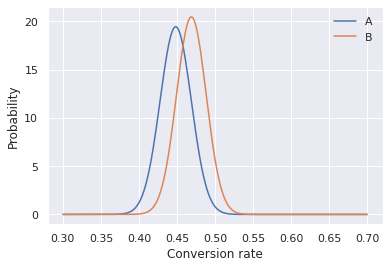

In [28]:


# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0.3, 0.7, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

Finally we can compute for our p value by finding the area under our new distribution.

zscore is 0.728, with p-value 0.233


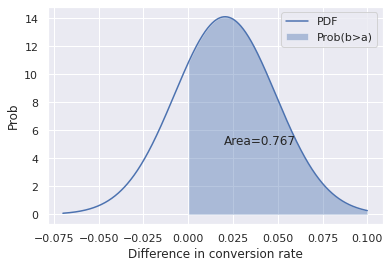

In [29]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.07, 0.1, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.4)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

**Confidence** is as follows. 

In [30]:
norm.cdf(z_score)

0.7667262946308229

#Sequential Test

In [31]:

# SPRT 
# Binomial Endpoints
import sprt as sprt
import numpy as np

# Null value
h0 = 0.5
# Alternative value
h1 = 0.55
# Type I error rate = 0.05
alpha = 0.05
# Type II error rate = 0.2
beta = 0.2
# Values
values = np.random.binomial(1, 0.55, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)

Decision:	Continue

     values   lower   upper
n                          
91       51  40.014  61.595
92       52  40.539  62.120
93       52  41.064  62.646
94       53  41.589  63.171
95       53  42.114  63.696
96       54  42.639  64.221
97       55  43.164  64.746
98       55  43.689  65.271
99       55  44.214  65.796
100      55  44.740  66.321


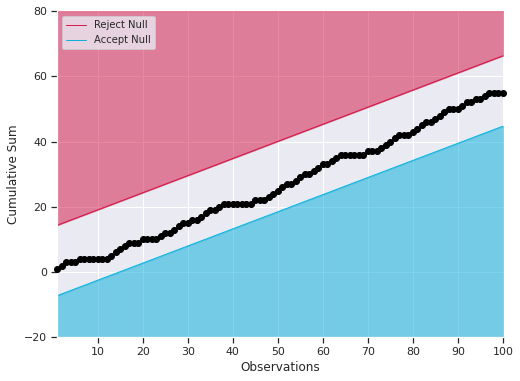

In [32]:
test.plot()